<hr>

</hr>
<br>
</br>

<img src="http://www.stickpng.com/assets/images/580b57fcd9996e24bc43c513.png" width="400">
<br>
</br>
<br>
</br>

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company does not own any lodging; it is merely a broker and receives percentage service fees (commissions) from both guests and hosts in conjunction with every booking. 

The aim of my  project is to use algorithms and libraries to mine the reviews people have submitted on Singapore AirBnB rentals in order to provide descriptive analytics.


## Load File
To start off, I imported and loaded the `airbnb_data.csv` as <b>a list of dictionaries</b>. 

In [2]:
import csv
airbnb_data = []
with open('airbnb_data.csv') as f:
    reader = csv.DictReader(f,delimiter=',')
    for row in reader:
        airbnb_data.append(dict(row))

#read the first key-value pair of airbnb_data dictionary
airbnb_data[0]    

{'listing_id': '1133718',
 'survey_id': '1280',
 'host_id': '6219420',
 'room_type': 'Shared room',
 'country': '',
 'city': 'Singapore',
 'borough': '',
 'neighborhood': 'MK03',
 'reviews': '9',
 'overall_satisfaction': '4.5',
 'accommodates': '12',
 'bedrooms': '1.0',
 'bathrooms': '',
 'price': '74.0',
 'minstay': '',
 'last_modified': '2017-05-17 09:10:25.431659',
 'latitude': '1.293354',
 'longitude': '103.769226',
 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}

### Data Cleaning
As previewed above, all key-value pairs were in type: `string`. 

However, there are certain columns with data that I want to be in type: `float` instead to work better with for data analysis. 

I will clean the following columns to their appropriate types:
1. `overall_satisfaction`
2. `price`
3. `longtitude`
4. `latitude`
5. `reviews`

In [4]:
for row in airbnb_data:
    row['overall_satisfaction'] = float(row['overall_satisfaction'])
    row['price'] = float(row['price'])
    row['reviews'] = float(row['reviews'])
    row['latitude'] = float(row['latitude'])
    row['longitude'] = float(row['longitude'])

airbnb_data[0]

{'listing_id': '1133718',
 'survey_id': '1280',
 'host_id': '6219420',
 'room_type': 'Shared room',
 'country': '',
 'city': 'Singapore',
 'borough': '',
 'neighborhood': 'MK03',
 'reviews': 9.0,
 'overall_satisfaction': 4.5,
 'accommodates': '12',
 'bedrooms': '1.0',
 'bathrooms': '',
 'price': 74.0,
 'minstay': '',
 'last_modified': '2017-05-17 09:10:25.431659',
 'latitude': 1.293354,
 'longitude': 103.769226,
 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}

## Descriptive Analytics Report Generation

### To find which hosts in Singapore have more than 30 listings, and how many such hosts are there

<i> The following are the steps I took:
1. I created a dictionary : `host_with_30`, to hold all unique hosts (key) and their total no. of listings (value).
2. I looped through airbnb_data and did a counter with `host_with_30` in order to sum the total no. of listings each host has.
3. To sieve out hosts in Singapore that have more than 30 listings, I simply looped through `host_with_30` to pick out host_id with >30 listings into `hosts`
4. I also used a counter `counts` within the same loop to count the no. of hosts with more than 30 listings
</i>

In [28]:
host_with_30 = {}

for row in airbnb_data:
    host_id = row['host_id']
    
    if host_id not in host_with_30:
        host_with_30[host_id] = 1
    else:
        host_with_30[host_id] += 1

hosts = str()
counts = 0

for k,v in host_with_30.items():
    if v > 30:
        hosts += k + ', '
        counts+= 1

print("The following hosts have more than 30 listings in Singapore: " + hosts[:-2] + '.')
print("\n")
print("There are " + str(counts) + " hosts that have more than 30 listings in Singapore")

The following hosts have more than 30 listings in Singapore: 76123088, 882659, 35691521, 31464513, 103759551, 8492007, 1439258, 32184450, 16940959, 20485973, 70290706, 51535991, 70265611, 229339, 101312755, 29420853, 31557326, 38987109, 51549370, 23722617, 10248444, 110565713, 4412979, 83423140, 99329030, 7210103, 14521708, 94765000.


There are 28 hosts that have more than 30 listings in Singapore


### To find the average price of the rooms in a certain neighbourhood e.g. ```MK03```

<i> The following are the steps I took:
1. Loop through airbnb_data to sieve out and sum up the prices of MK03 into the variable `total_price`
2. I added a counter `num_of_rooms` to count the number of rooms in MK03
3. Average = total price/no. of rooms
</i>


In [29]:
total_price = 0
num_of_rooms = 0

for rec in airbnb_data:
    if rec['neighborhood'] == 'MK03':
        total_price += rec['price']
        num_of_rooms += 1
result = round((total_price / num_of_rooms),2)
print("The average price of the rooms in MK03 is $" + str(result))

The average price of the rooms in MK03 is $76.92


### To find the *top 10 priciest rooms in Singapore*

I will create a list `room_id_price` with inner lists showing each `room_id` with its corresponding `price`.

<i> The following are the steps I took:
1. I created a list that will store many room_id - price pairs
2. I sorted from the largest to the smallest price by reversing the `room_id_price` list and accessing the second element `price` of each inner list
</i>

In [5]:
room_id_price = []

for row in airbnb_data:
    room_id = row['room_id']
    price = row['price']
    
    room_id_price.append([room_id,price])

room_id_price.sort(reverse=True, key=lambda x:x[1])
print(room_id_price[:10])

[['16395877', 8023.0], ['9815599', 3309.0], ['13117403', 3029.0], ['17794853', 2206.0], ['14620083', 2164.0], ['16327246', 2059.0], ['5775503', 1103.0], ['12372683', 1029.0], ['15861144', 1027.0], ['9020629', 981.0]]


### To find the top 10 most expensive neighborhoods with at least 10 listings, based on their average price
I will create a list `neighborhoods` with inner lists showing each `neighborhood_id` with its corresponding `price`.

<i> The following are the steps I took:
1. I looped through the `airbnb_data` data to append to a list the different prices of rooms in each neighbourhood into a dictionary `host_with_30`
2. I then looped through `host_with_30` to sieve out neighbourhoods with at least 10 listings, and calculated their average price.
3. I appended a list with [neighbourhood, average price] into the list `neighbourhood_price`
4. Finally, I sorted from the largest to the smallest price by reversing the neighbourhood_price list and accessing the second element: the average price in each inner list
</i>

In [55]:
neighborhoods = {}

for row in airbnb_data:
    neighborhood = row['neighborhood']
    price = row['price']
    
    if neighborhood not in neighborhoods:
        neighborhoods[neighborhood] = [price]
    else:
        neighborhoods[neighborhood].append(price)

neighbourhood_price = []

for k,v in neighborhoods.items():
    if len(v) > 10:
        neighbourhood_price.append([k, sum(v)/len(v)])
        
neighbourhood_price.sort(reverse=True, key=lambda x:x[1])
neighbourhood_price[:10]

[['MK34', 1428.6666666666667],
 ['TS01', 279.1818181818182],
 ['TS30', 213.51351351351352],
 ['TS27', 191.94495412844037],
 ['TS02', 153.48648648648648],
 ['TS29', 149.7111111111111],
 ['TS25', 148.73529411764707],
 ['MK17', 145.51006711409397],
 ['TS03', 140.09558823529412],
 ['TS05', 138.42]]

### To find the top 10 host_id has the highest average satisfaction level where each listing has at least had 1 review, for hosts that host more than 10 listings 
I will create a list `host_satisfaction` with inner lists showing each `host_id` with its corresponding `satisfaction`.

<i> The following are the steps I took:
1. I looped through the airbnb_data data to append to a list the different satisfaction received by different `host_id` into a dictionary host_with_30
2. I then looped through host_with_30 to sieve out neighbourhoods with more than 10 listings, and calculated their average satisfaction.
3. I appended a list with [neighbourhood, average price] into the list `host_id_satisfaction`
4. Finally, I sorted from the largest to the smallest satisfaction rating by reversing the `host_id_satisfaction` list and accessing the second element: the average satisfaction in each inner list
</i>

In [56]:
host_satisfaction = {}

for row in airbnb_data:
    host_id = row['host_id']
    satisfaction = row['overall_satisfaction']
    reviews = row['reviews']
    if reviews >= 1:
        if host_id not in host_satisfaction:
            host_satisfaction[host_id] = [satisfaction]
        else:
            host_satisfaction[host_id].append(satisfaction)

host_id_satisfaction = []

for k,v in host_satisfaction.items():
    if len(v) > 10:
        host_id_satisfaction.append([k, sum(v)/len(v)])
        
host_id_satisfaction.sort(reverse=True, key=lambda x:x[1])
host_id_satisfaction[:10]

[['4705949', 4.8],
 ['882659', 4.75],
 ['20828188', 4.730769230769231],
 ['6609641', 4.5],
 ['20874965', 4.433333333333334],
 ['17526618', 4.375],
 ['19689637', 4.346153846153846],
 ['14521708', 4.315384615384615],
 ['3544325', 4.266666666666667],
 ['23722617', 4.205882352941177]]

## Visualisation

### Plot a geographical representation of all the rooms in the top 10 most expensive neighborhoods based on their average price, with at least 10 listings
<i> The following are the steps I took:
1. Loop through `neighbourhood_price` to get all the `neighborhood_id` in a list `all_neighborhoods`
2. Loop through `airbnb_data` to create the x and y axis, `lat` and `lon` respectively, of each neighborhood found in `all_neighborhoods`
3. Append lat and lon into `all_lat` and `all_lon` accordingly
4. Plot as a scatterplot
</i>

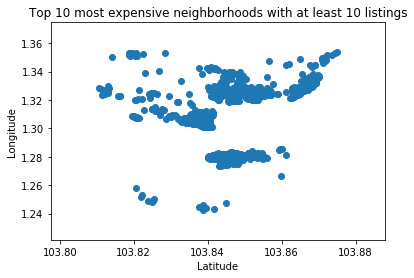

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
all_neighborhoods = [x[0] for x in neighbourhood_price[:10]]

all_lat = []
all_lon = []

for data in airbnb_data:
    neighborhood = data['neighborhood']
    lat = data['latitude']
    lon = data['longitude']
    
    if neighborhood in all_neighborhoods:
        all_lat.append(lat)
        all_lon.append(lon)
        
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Top 10 most expensive neighborhoods with at least 10 listings")
plt.scatter(all_lon,all_lat)

### Plot a geographical representation of all the rooms of the top 10 host_id that have the highest average satisfaction level with more than 10 listings where each listing has at least had 1 review

<i> The following are the steps I took:
1. Loop through `host_id_satisfaction` to get all the `host_id` in a list `all_host_ids`
2. Loop through `airbnb_data` to create the x and y axis, lat and lon respectively, of each neighborhood found in `all_host_ids`
3. Append lat and lon into all_lat and all_lon accordingly
4. Plot as a scatterplot
</i>

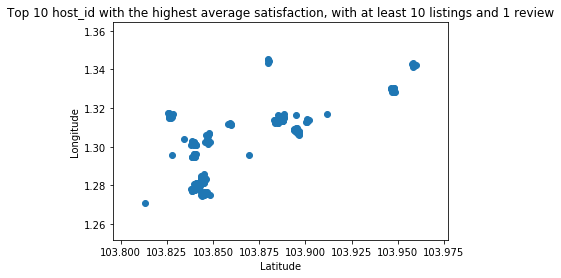

In [38]:
import matplotlib.pyplot as plt
all_host_ids = []
all_host_ids = [x[0] for x in host_id_satisfaction[:10]]

all_lat = []
all_lon = []

for data in airbnb_data:
    host_id = data['host_id']
    lat = data['latitude']
    lon = data['longitude']
    
    if host_id in all_host_ids:
        all_lat.append(lat)
        all_lon.append(lon)
        

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Top 10 host_id with the highest average satisfaction, with at least 10 listings and 1 review")
plt.scatter(all_lon,all_lat)

## Satisfaction Map

### To find out which region of Singapore has rooms that people are generally more satisfied with. 

To standardize:
* Any room which has a rating `>4` would indicate a highly satisfactory room, and `>=2.5` would indicate an average room. 
* Any rating `<2.5` indicates an unsatisfactory room. 

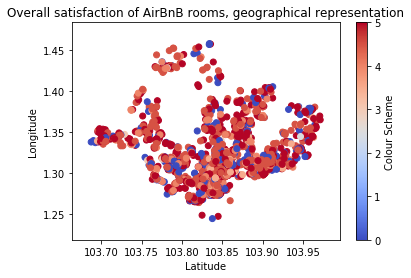

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# Initialise lat, Lon, and satisfaction as empty lists
lat = []
lon = []
satisfaction = []

# Populate lat, lon and satisfaction lists
for data in airbnb_data:
    if data['reviews'] > 1:  
        satisfaction.append(float(data["overall_satisfaction"]))
        lat.append(float(data["latitude"]))
        lon.append(float(data["longitude"]))

# To create the colour scheme based on satisfaction
max_satisfaction = max(satisfaction)
min_satisfaction = min(satisfaction)
color_by = satisfaction

# Add labels to the chart
fig, ax = plt.subplots()

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Overall satisfaction of AirBnB rooms, geographical representation")

# Plot the points on the graph, as a scatter plot, with visible different degrees of satisfaction
s=plt.scatter(lon, # X-axis
            lat, # Y-axis
            c=color_by, # Color based on satisfaction
            cmap = plt.cm.coolwarm, # I chose this color scheme to represent the degree of satisfaction
            vmin=min_satisfaction, # Blue
            vmax=max_satisfaction) # Red

# To create the color scheme bar on the right (legend)
cbar = plt.colorbar(mappable=s, ax=ax)
cbar.set_label("Colour Scheme")


# Show the graph
plt.show()

### Conclusion
<b> Overall insights I gleaned from this project:</b>

In Singapore, 
* Most hosts have less than 30 listings.
* There is a big difference between the most and second most expensive listing.
* There is a big difference between the most and second most expensive neighborhood.
* The top 10 most expensive neighborhoods are located in the Northern region
* Close to none of the top 10 host_id <i>(with the highest average satisfaction and at least 10 listings and 1 review)</i> are located in the South-East region
* Yet, the South-East region appears to have the greatest concentration of AirBnB rooms